In [0]:
import keras
import pandas as pd
import numpy as np

# 1. Data Preparation

In [0]:
max_item_id = 10000		# use as a way to constrict memory errors, increase as needed

## 1.1 Playtime Matrix

Main input: user_item_playtime matrix.

In [0]:
writefilepath = './user_items_playtime_' + str(max_item_id) + '.csv'
df_matrix = pd.read_csv(writefilepath,engine='python')
print(df_matrix.shape)
df_matrix.head()

(61244, 354)


,10,20,30,40,50,60,70,80,100,130,...,9870,9880,9900,9930,9940,9960,9970,9980,9990,10000
0,6,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,224,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,93,89,16,4,178,0,108,13,47,313,...,0,0,0,0,0,0,0,0,0,0


The actual playtime is too large, which make it difficult to train. So scale them to (0,10)

In [0]:
##scale matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,10))
scaled_values = scaler.fit_transform(df_matrix)
df_scaled_matrix = pd.DataFrame(scaled_values)
#df.loc[:,:] = scaled_values

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
df_scaled_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,353
0,0.000168,0.000000,0.000478,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.397022,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.002611,0.006291,0.001092,0.000541,0.024064,0.0,0.014044,0.000643,0.079499,0.042322,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## 1.2 Game names for each user

For each user, take the name of the games he/she played. Note that the 1st user in this dataset is the 1st user in the above playtime matrix, etc.

In [0]:
writefilepath = './user_game_names_' + str(max_item_id) + '.csv'
df_user_gamenames = pd.read_csv(writefilepath)
df_user_gamenames

,userid,game_names
0,76561197970982479,"['Counter-Strike', 'Day of Defeat', 'Day of De..."
1,js41637,"['Day of Defeat: Source', 'Counter-Strike: Sou..."
2,evcentric,"['Red Orchestra: Ostfront 41-45', 'DEFCON', 'H..."
3,Riot-Punch,"['Day of Defeat: Source', 'Counter-Strike: Sou..."
4,doctr,"['Day of Defeat: Source', 'Team Fortress Class..."
5,MinxIsBetterThanPotatoes,"['Half-Life: Opposing Force', 'Counter-Strike:..."
6,NitemarePK,"['Counter-Strike: Source', 'Psychonauts', ""Gar..."
7,themanwich,"['Half-Life 2', 'Half-Life 2: Deathmatch', ""Ga..."
8,maplemage,"['Counter-Strike: Source', 'Day of Defeat: Sou..."
9,corrupted_soul,"[""Garry's Mod"", 'Killing Floor', 'STAR WARS鈩 B..."


In [0]:
#transform games names from word to int, using one_hot
from keras.preprocessing.text import one_hot

vocab_size   = 100
encoded_gamenames = [one_hot(d, vocab_size) for d in df_user_gamenames.game_names]

In [0]:
df_user_gamenames_encoded = pd.DataFrame(data=encoded_gamenames).fillna(0.0)    # Fill Nan with 0
df_user_gamenames_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,468,469,470,471,472,473,474,475,476,477
0,94,76.0,84.0,3.0,85.0,84.0,3.0,46.0,7.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,84,3.0,46.0,7.0,94.0,48.0,7.0,37.0,20.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,80.0,81.0,87.0,76.0,25.0,11.0,64.0,80.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,3.0,46.0,7.0,94.0,48.0,7.0,98.0,80.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,84,3.0,46.0,7.0,88.0,49.0,34.0,11.0,64.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.3 Game Genre

## 1.4 User review

##1.5 Game Info

In [0]:
df_games = pd.read_csv('./steam_games.csv',index_col="Unnamed: 0")
df_games.head()

,name,genres,publisher,developer,price
10,Counter-Strike,['Action'],Valve,Valve,9.99
20,Team Fortress Classic,['Action'],Valve,Valve,4.99
30,Day of Defeat,['Action'],Valve,Valve,4.99
40,Deathmatch Classic,['Action'],Valve,Valve,4.99
50,Half-Life: Opposing Force,['Action'],Gearbox Software,Valve,4.99


# 2. Model Compilation & Training

In [0]:
from keras.optimizers import Adam
from keras.layers import Lambda, Input, Dense, Dropout, Embedding, Flatten, add
from keras.models import Model
from keras.losses import mse, binary_crossentropy
from keras import backend as K

In [0]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

References:

Basic Autoencoder: https://github.com/marlesson/recsys_autoencoders/blob/master/notebooks/DeepAutoEncoderContent%20-%20Simple%20Train.ipynb

Variational part: https://blog.keras.io/building-autoencoders-in-keras.html

In [0]:
# input
X = [df_scaled_matrix.values, df_user_gamenames_encoded.values]
y = df_scaled_matrix.values

In [65]:
X

[array([[0.00016844, 0.        , 0.00047787, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]), array([[94., 76., 84., ...,  0.,  0.,  0.],
        [84.,  3., 46., ...,  0.,  0.,  0.],
        [29., 80., 81., ...,  0.,  0.,  0.],
        ...,
        [94., 48., 35., ...,  0.,  0.,  0.],
        [11., 64., 80., ...,  0.,  0.,  0.],
        [94., 48., 35., ...,  0.,  0.,  0.]])]

In [0]:
users_items_matrix, content_info = X

# Parameters
int_dim = 512 # intermidiate dimension
lat_dim = 256 # latent dimension

# Input
input_layer   = Input(shape=(users_items_matrix.shape[1],), name='UserScore')
input_content = Input(shape=(content_info.shape[1],), name='Itemcontent')

# Encoder
# -----------------------------
enc = Dense(int_dim, activation='selu', name='EncLayer1')(input_layer) #selu

# Content Information
x_content = Embedding(100, lat_dim, input_length=content_info.shape[1])(input_content)
x_content = Flatten()(x_content)
x_content = Dense(lat_dim, activation='selu', name='ItemLatentSpace')(x_content) #selu

# Latent Space
# -----------------------------
lat_space = Dense(lat_dim, activation='selu', name='UserLatentSpace')(enc) #selu
lat_space = add([lat_space, x_content], name='LatentSpace')
lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout


# Sampling
# ----------------------------- 
mean = Dense(lat_dim)(lat_space)
log_sigma = Dense(lat_dim)(lat_space)
samplings = Lambda(sampling, output_shape=(lat_dim,))([mean, log_sigma])


# Decoder
# -----------------------------
dec = Dense(int_dim, activation='selu', name='DecLayer1')(samplings) #selu

# Output
output_layer = Dense(users_items_matrix.shape[1], activation='sigmoid', name='UserScorePred')(dec) #linear

# this model maps an input to its reconstruction
model = Model([input_layer, input_content], output_layer)\

In [74]:
# loss
def vae_loss(input_layer, output_layer):
    xent_loss = binary_crossentropy(input_layer, output_layer)
    kl_loss = - 0.5 * K.mean(1 + log_sigma - K.square(mean) - K.exp(log_sigma), axis=-1)
    return xent_loss + kl_loss

model.compile(optimizer = Adam(lr=0.00005),loss=vae_loss,metrics=['mse'])
  
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Itemcontent (InputLayer)        (None, 478)          0                                            
__________________________________________________________________________________________________
UserScore (InputLayer)          (None, 354)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 478, 256)     25600       Itemcontent[0][0]                
__________________________________________________________________________________________________
EncLayer1 (Dense)               (None, 512)          181760      UserScore[0][0]                  
__________________________________________________________________________________________________
flatten_5 

In [75]:
hist = model.fit(x=X, y=y,
                  epochs=20,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Train on 55119 samples, validate on 6125 samples
Epoch 1/20
55119/55119 [==============================] - 58s 1ms/step - loss: 0.1119 - mean_squared_error: 0.0118 - val_loss: 0.0343 - val_mean_squared_error: 0.0025
Epoch 2/20
55119/55119 [==============================] - 54s 987us/step - loss: 0.0956 - mean_squared_error: 0.0112 - val_loss: 0.0329 - val_mean_squared_error: 0.0033
Epoch 3/20
55119/55119 [==============================] - 54s 986us/step - loss: 0.0830 - mean_squared_error: 0.0104 - val_loss: 0.0297 - val_mean_squared_error: 0.0030
Epoch 4/20
55119/55119 [==============================] - 54s 982us/step - loss: 0.0774 - mean_squared_error: 0.0104 - val_loss: 0.0271 - val_mean_squared_error: 0.0026
Epoch 5/20
55119/55119 [==============================] - 54s 979us/step - loss: 0.0684 - mean_squared_error: 0.0098 - val_loss: 0.0247 - val_mean_squared_error: 0.0024
Epoch 6/20
55119/55119 [==============================] - 57s 1ms/step - loss: 0.0598 - mean_squared_error: 

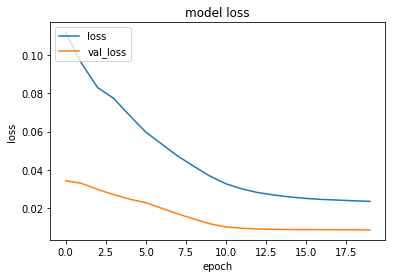

In [76]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    
    plt.legend(['loss', 'val_loss'], loc='upper left')

plot_hist(hist)

# 3. Predition and Recommendation

In [77]:
# Set played game to zero, so that we dont recommend games played
pred_matrix = model.predict(X) * (X[0] == 0)
pred_matrix

array([[0.0000000e+00, 4.5684278e-03, 0.0000000e+00, ..., 2.6080608e-03,
        4.0870011e-03, 6.3154101e-04],
       [6.3011050e-03, 4.8109889e-04, 2.5382638e-04, ..., 2.7486682e-04,
        7.5072050e-04, 3.7068129e-04],
       [8.1420839e-03, 1.9524395e-03, 1.5484095e-03, ..., 1.8298626e-04,
        2.6604533e-04, 2.9933453e-04],
       ...,
       [5.0802231e-03, 1.5860796e-04, 7.2211027e-05, ..., 7.4952841e-05,
        1.7735362e-04, 1.0022521e-04],
       [8.9128613e-03, 2.1282732e-03, 1.2883246e-03, ..., 6.8408251e-04,
        7.6535344e-04, 5.4222345e-04],
       [7.3961020e-03, 1.8972158e-04, 1.3783574e-04, ..., 2.3403764e-04,
        2.9101968e-04, 2.5811791e-04]], dtype=float32)

In [78]:
# converting the reconstructed matrix back to a Pandas dataframe
df_pred_matrix  = pd.DataFrame(pred_matrix, 
                               columns = df_matrix.columns, 
                               index   = df_matrix.index)
df_pred_matrix.head()

,10,20,30,40,50,60,70,80,100,130,...,9870,9880,9900,9930,9940,9960,9970,9980,9990,10000
0,0.000000,0.004568,0.000000,0.000790,0.004570,0.000622,0.015960,0.005950,0.026497,0.002675,...,0.013443,0.002183,0.018489,0.007151,0.001195,0.000782,0.000963,0.002608,0.004087,0.000632
1,0.006301,0.000481,0.000254,0.000139,0.004111,0.000232,0.007403,0.001067,0.008286,0.000258,...,0.006997,0.001067,0.005540,0.003216,0.000000,0.000136,0.000161,0.000275,0.000751,0.000371
2,0.008142,0.001952,0.001548,0.000089,0.001632,0.000127,0.007256,0.002009,0.010978,0.000706,...,0.001637,0.001074,0.006228,0.003217,0.001097,0.000244,0.000054,0.000183,0.000266,0.000299
3,0.018985,0.000971,0.008054,0.002491,0.005827,0.001278,0.006049,0.002432,0.025850,0.005012,...,0.006078,0.002622,0.019309,0.010743,0.004291,0.000200,0.000372,0.001320,0.001049,0.001500
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000161,0.000000,0.000000,0.000000,0.000000,...,0.001868,0.001249,0.007153,0.002909,0.001387,0.000054,0.000345,0.000324,0.000487,0.000500


In [0]:
def recommendor(user_id, df_matrix, df_pred_matrix, df_games = df_games, topn = 5):
	#Get general scores
	pred_scores = df_pred_matrix.loc[user_id].values #get the user column
	df_scores_all = pd.DataFrame({'score': pred_scores},index = df_matrix.columns.astype(	int))

	#First tell user history
	played = df_scores_all[df_scores_all['score'] == 0].index
	df_played_game = df_games.reindex(played)
	df_playtime = pd.DataFrame({'time': df_matrix.loc[user_id].values},index = 	df_matrix.columns.astype(int))
	df_played_time = df_playtime.reindex(played)
	df_history = pd.merge(df_played_time, df_played_game, left_index=True, 	right_index=True).sort_values('time', ascending=False)
	df_history.index.name = 'game_id'
	print('User played:')
	print(df_history.head(10))
	
	#Then results
	df_scores_unplayed = df_scores_all[df_scores_all['score'] != 0]  #get rid of played games
	topn = min(len(df_scores_unplayed.index),topn) 
	df_recommend = pd.merge(df_scores_unplayed, df_games.reindex(df_scores_unplayed.index), 	left_index=True, right_index=True)
	df_recommend.index.name = 'game_id'
	print('We recommend:')
	print(df_recommend.sort_values('score', ascending=False).head(topn))
    
	return 

In [80]:
recommendor(user_id = 0, df_matrix = df_matrix, df_pred_matrix = df_pred_matrix, topn = 5, df_games = df_games)

User played:
          time                               name                   genres  \
game_id                                                                      
730      23532   Counter-Strike: Global Offensive               ['Action']   
8930     10345        Sid Meier's Civilization® V             ['Strategy']   
1250     10006                      Killing Floor               ['Action']   
300       4733              Day of Defeat: Source               ['Action']   
3590      4413    Plants vs. Zombies GOTY Edition             ['Strategy']   
8190      3083                       Just Cause 2  ['Action', 'Adventure']   
8980      3061                        Borderlands        ['Action', 'RPG']   
6910      2685  Deus Ex: Game of the Year Edition               ['Action']   
8870      2084                  BioShock Infinite               ['Action']   
240       1853             Counter-Strike: Source               ['Action']   

                                                 p

In [81]:
recommendor(user_id = 40000, df_matrix = df_matrix, df_pred_matrix = df_pred_matrix, topn = 5, df_games = df_games)

User played:
          time                              name      genres publisher  \
game_id                                                                  
550      97101                     Left 4 Dead 2  ['Action']     Valve   
730       9201  Counter-Strike: Global Offensive  ['Action']     Valve   
320       2582           Half-Life 2: Deathmatch  ['Action']     Valve   
10         395                    Counter-Strike  ['Action']     Valve   

        developer  price  
game_id                   
550         Valve  19.99  
730         Valve  14.99  
320         Valve   4.99  
10          Valve   9.99  
We recommend:
            score               name                   genres  \
game_id                                                         
8870     0.130790  BioShock Infinite               ['Action']   
4000     0.121083        Garry's Mod  ['Indie', 'Simulation']   
220      0.100384        Half-Life 2               ['Action']   
400      0.099118             Portal     